In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

In [2]:
import sys
import os
sys.path.append("../../")

In [3]:
from axion_kSZ_source.auxiliary.helper_functions import is_array

In [4]:
r_vals = np.arange(20.0, 180.0, 2.0)
m_a=1e-25

In [5]:
derivs = np.load(f"../../fisher_outputs/test_derivs_ma={m_a:.3E}.npy")

In [6]:
derivs.shape

(36, 10, 5, 80)

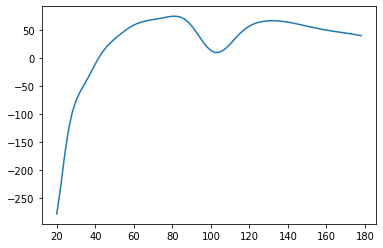

In [7]:
plt.plot(r_vals, derivs[0,0,0,:])

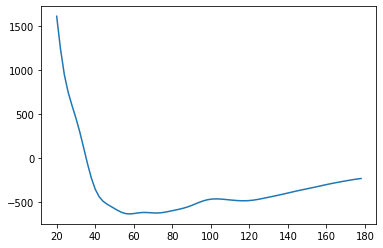

In [8]:
plt.plot(r_vals, derivs[0,1,0,:])

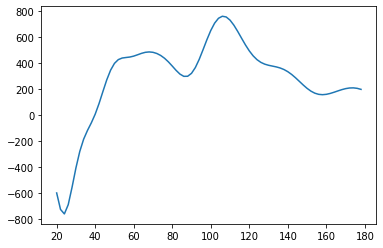

In [9]:
plt.plot(r_vals, derivs[0,2,0,:])

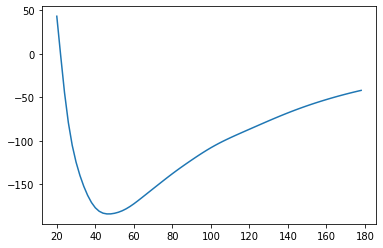

In [10]:
plt.plot(r_vals, derivs[0,3,0,:])

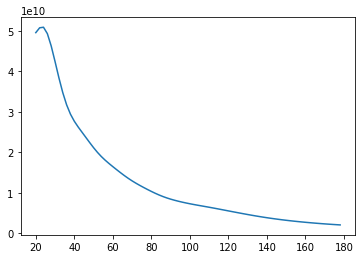

In [11]:
plt.plot(r_vals, derivs[0,4,0,:])

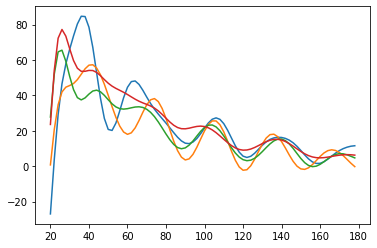

In [12]:
plt.plot(r_vals, derivs[-24,5,0,:])
plt.plot(r_vals, derivs[-24,6,0,:])
plt.plot(r_vals, derivs[-24,7,0,:])
plt.plot(r_vals, derivs[-24,8,0,:])

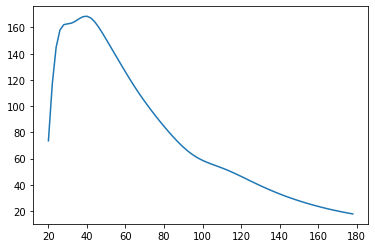

In [13]:
plt.plot(r_vals, derivs[-10,9,2,:])

In [14]:
axion_abundances[-24]

NameError: name 'axion_abundances' is not defined

In [15]:
fisher = np.load(f"../../fisher_outputs/test_fisher_matrices_ma={m_a:.3E}.npy", allow_pickle=True)

In [16]:
axion_abundances = np.array([1.0e-04, 1.6e-04, 2.5e-04, 4.0e-04, 6.3e-04, 1.0e-03, 1.6e-03, 2.5e-03, 4.0e-03, 6.3e-03, 1.0e-02, 1.6e-02, 2.5e-02, 4.0e-02, 5.3e-02, 6.3e-02, 1.0e-01, 1.1e-01, 1.6e-01, 2.1e-01, 2.5e-01, 2.6e-01, 3.2e-01, 3.7e-01, 4.0e-01, 4.2e-01, 4.7e-01, 5.3e-01, 5.8e-01, 6.3e-01, 6.8e-01, 7.4e-01, 7.9e-01, 8.4e-01, 8.9e-01, 9.5e-01])

In [17]:
axion_constraints = np.full((len(axion_abundances), 4), np.nan)

In [18]:
for i,frac in enumerate(axion_abundances):
    for j in range(4):
        axion_constraints[i,j] = np.sqrt(np.linalg.inv(fisher[4*i+j]).diagonal()[5])

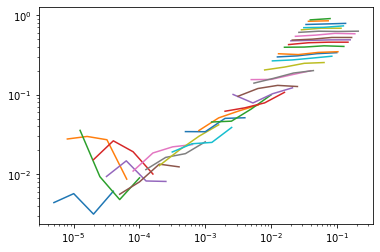

In [19]:
for i,frac in enumerate(axion_abundances):
    plt.plot(np.array([0.05, 0.1, 0.2, 0.4])*frac, np.clip(frac+2*axion_constraints[i], 0.0, 1.0))
plt.axhline(0.0)
plt.yscale('log')
plt.xscale('log')
#plt.ylim(1e-2, 10.0)

<ipython-input-20-d0c3f3a56f02>:1: RuntimeWarning: All-NaN slice encountered
  plt.errorbar(axion_abundances, axion_abundances, yerr=2*np.nanmax(axion_constraints, axis=-1), fmt="x")


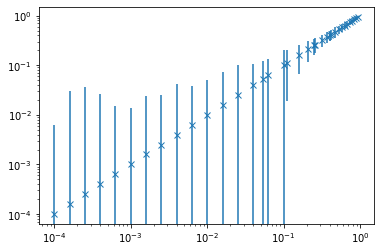

In [20]:
plt.errorbar(axion_abundances, axion_abundances, yerr=2*np.nanmax(axion_constraints, axis=-1), fmt="x")
plt.yscale('log')
plt.xscale('log')

In [21]:
np.diff(axion_constraints, axis=-1)/axion_abundances[:, np.newaxis]

array([[ 6.53441113e+00, -1.28006661e+01,  1.48521732e+01],
       [ 6.62763308e+00, -8.49794243e+00, -5.77838025e+01],
       [-5.26248377e+01, -9.06848418e+00,  8.43168885e+00],
       [ 1.38344596e+01, -8.93927684e+00, -1.13975423e+01],
       [ 4.26209411e+00, -5.17643721e+00, -8.43969370e-02],
       [ 1.20304824e+00,  2.69489641e+00, -5.06319224e-01],
       [ 2.35981654e+00,  1.12878520e+00,  4.63652626e-01],
       [ 9.71499775e-01,  3.76483824e-01,  1.48384374e+00],
       [ 9.03038001e-01,  1.24577651e+00,  1.47821517e+00],
       [ 4.07855649e-01,  7.64077964e-02,  1.08144310e+00],
       [-5.39790882e-03,  8.07795103e-01,  4.52044642e-02],
       [ 4.90701165e-01,  3.47590315e-01,  3.77575524e-01],
       [ 2.23968460e-02,  3.91100811e-01,  6.66730334e-01],
       [ 8.00367092e-02,  1.31593631e-01,  3.50790461e-01],
       [-2.07095472e-01,  2.28005274e-01,  1.80362571e-01],
       [ 1.89612514e-01,  9.05015763e-02, -3.34408400e-02],
       [ 4.17772091e-03,  1.07120123e-01

In [22]:
axion_abundances

array([1.0e-04, 1.6e-04, 2.5e-04, 4.0e-04, 6.3e-04, 1.0e-03, 1.6e-03,
       2.5e-03, 4.0e-03, 6.3e-03, 1.0e-02, 1.6e-02, 2.5e-02, 4.0e-02,
       5.3e-02, 6.3e-02, 1.0e-01, 1.1e-01, 1.6e-01, 2.1e-01, 2.5e-01,
       2.6e-01, 3.2e-01, 3.7e-01, 4.0e-01, 4.2e-01, 4.7e-01, 5.3e-01,
       5.8e-01, 6.3e-01, 6.8e-01, 7.4e-01, 7.9e-01, 8.4e-01, 8.9e-01,
       9.5e-01])

In [23]:
axion_constraints

array([[0.00216117, 0.00281461, 0.00153454, 0.00301976],
       [0.01381942, 0.01487984, 0.01352017, 0.00427476],
       [0.01770966, 0.00455345, 0.00228633, 0.00439425],
       [0.00745037, 0.01298416, 0.00940845, 0.00484943],
       [0.00438922, 0.00707434, 0.00381318, 0.00376001],
       [0.00231744, 0.00352049, 0.00621539, 0.00570907],
       [0.00470224, 0.00847795, 0.01028401, 0.01102585],
       [0.00448437, 0.00691312, 0.00785433, 0.01156394],
       [0.00443342, 0.00804557, 0.01302868, 0.01894154],
       [0.0063936 , 0.00896309, 0.00944446, 0.01625755],
       [0.01220613, 0.01215215, 0.0202301 , 0.02068214],
       [0.00974487, 0.01759609, 0.02315753, 0.02919874],
       [0.01020875, 0.01076867, 0.02054619, 0.03721445],
       [0.01102104, 0.01422251, 0.01948626, 0.03351788],
       [0.0238591 , 0.01288304, 0.02496732, 0.03452653],
       [0.0163223 , 0.02826789, 0.03396949, 0.03186272],
       [0.02734776, 0.02776553, 0.03847754, 0.05003955],
       [0.01486146, 0.02536291,